# Classify Reviews With Large Language Models
In this notebook I will be using several pre-trained Large Language Models to classify if a review is positive, neutral or negative.
I will also compare which one classifies best.

## Preperation

Install and import libraries. </br>
Transformers for using the pipeline, a feature of Huggingface which allows me to easily setup and use pre-trained models from one pipeline. This is also nice to switch between models. </br>
Pandas to put results/values in dataframes

In [9]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\alpay\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\alpay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Define models, pipelines, reviews and labels
**Models:** I am using DistilBERT, BART and RoBERTa <br>
**Reviews:** I made a few reviews from which some are easy to classify and some are harder, like "I dont know what to think about this" to see what the model desicions the model will make. <br>
**Labels:** I am using 3 labels. Positive, Negative and Neutral. <br>

In [2]:
# Initialize the pipelines for the three models
models = {
    "distilbert": "typeform/distilbert-base-uncased-mnli",
    "bart": "facebook/bart-large-mnli",
    "roberta": "roberta-large-mnli"
}
pipelines = {name: pipeline("zero-shot-classification", model=model_name) for name, model_name in models.items()}

# Define input data and labels
reviews = [
    ["This product was great! I absolutely loved it.", "positive"],
    ["Worst purchase I have made. Completely disappointed.", "negative"],
    ["Okay product, but would not buy again.", "neutral"],
    ["I dont know what to think about this product.", "neutral"],
    ["its not bad but not good either.", "neutral"]
]
labels = ["positive", "negative", "neutral"]

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertFo

## Use pre-trained models to classify

Everything that was prepped before, is now going to be looped trough and runned. <br>
The label and score (confident) will be stored so we can later evaluate.

In [3]:
# Adjusted function to evaluate a model and include scores
def evaluate_model(pipeline, reviews, labels):
    results = []
    for review_data in reviews:
        review_text, _ = review_data  # Unpack the review text and ignore the label
        result = pipeline(review_text, labels)
        # Append both label and score for the top result
        top_result = result['labels'][0]
        top_score = result['scores'][0]
        results.append(f"{top_result}, Score: {top_score:.2f}")
    return results

# Evaluate each model and include scores in the results
model_results = {name: evaluate_model(pipeline, reviews, labels) for name, pipeline in pipelines.items()}

print(model_results)

{'distilbert': ['positive, Score: 1.00', 'negative, Score: 0.99', 'positive, Score: 0.41', 'neutral, Score: 0.63', 'negative, Score: 0.93'], 'bart': ['positive, Score: 0.99', 'negative, Score: 0.99', 'neutral, Score: 0.56', 'negative, Score: 0.59', 'neutral, Score: 0.89'], 'roberta': ['positive, Score: 0.98', 'negative, Score: 0.98', 'negative, Score: 0.74', 'neutral, Score: 0.52', 'neutral, Score: 0.54']}


Convert results to dataframe

In [4]:
# Extract just the review texts from the reviews list of lists
review_texts = [review[0] for review in reviews]

# Convert the results to a DataFrame using review_texts as the index
df_results = pd.DataFrame(model_results, index=review_texts)

# Add the actual answers (true labels) to the DataFrame
df_results['true_label'] = [review[1] for review in reviews]

print(df_results)


                                                               distilbert  \
This product was great! I absolutely loved it.      positive, Score: 1.00   
Worst purchase I have made. Completely disappoi...  negative, Score: 0.99   
Okay product, but would not buy again.              positive, Score: 0.41   
I dont know what to think about this product.        neutral, Score: 0.63   
its not bad but not good either.                    negative, Score: 0.93   

                                                                     bart  \
This product was great! I absolutely loved it.      positive, Score: 0.99   
Worst purchase I have made. Completely disappoi...  negative, Score: 0.99   
Okay product, but would not buy again.               neutral, Score: 0.56   
I dont know what to think about this product.       negative, Score: 0.59   
its not bad but not good either.                     neutral, Score: 0.89   

                                                                  roberta 

This method will evaluate also what the confidents of the models were on the other labels then what they classified, this helps with getting insight in how close a model was from classifying positive instead of neutral for example.

In [5]:
def evaluate_model(pipeline, reviews, labels):
    results = []
    for review_data in reviews:
        review_text, _ = review_data  # Unpack the review text and ignore the label
        result = pipeline(review_text, labels)
        # Initialize a string with the review text to store results for the current review
        review_results = f"Review: \"{review_text}\" - Predictions: "
        for label, score in zip(result['labels'], result['scores']):
            # Append each label and its score to the review_results string
            review_results += f"{label}, Score: {score:.2f}; "
        # Append the formatted string for the current review to the results list
        results.append(review_results.strip("; "))  # Remove the trailing semicolon and space
    return results

# Evaluate each model and include scores in the results
model_results1 = {name: evaluate_model(pipeline, reviews, labels) for name, pipeline in pipelines.items()}

print(model_results1)

{'distilbert': ['Review: "This product was great! I absolutely loved it." - Predictions: positive, Score: 1.00; neutral, Score: 0.00; negative, Score: 0.00', 'Review: "Worst purchase I have made. Completely disappointed." - Predictions: negative, Score: 0.99; neutral, Score: 0.00; positive, Score: 0.00', 'Review: "Okay product, but would not buy again." - Predictions: positive, Score: 0.41; neutral, Score: 0.38; negative, Score: 0.21', 'Review: "I dont know what to think about this product." - Predictions: neutral, Score: 0.63; negative, Score: 0.36; positive, Score: 0.01', 'Review: "its not bad but not good either." - Predictions: negative, Score: 0.93; neutral, Score: 0.07; positive, Score: 0.01'], 'bart': ['Review: "This product was great! I absolutely loved it." - Predictions: positive, Score: 0.99; neutral, Score: 0.01; negative, Score: 0.00', 'Review: "Worst purchase I have made. Completely disappointed." - Predictions: negative, Score: 0.99; neutral, Score: 0.00; positive, Score

## Visualize

To compare more clear, I am going to visualize the data with the dataframe that we made earlier.

In [6]:
# Adjusting the code to rename "score" to "confidence"
df_results[['distilbert_prediction', 'distilbert_confidence']] = df_results['distilbert'].str.split(',', expand=True)
df_results['distilbert_confidence'] = df_results['distilbert_confidence'].str.replace('Score: ', '').astype(float)

df_results[['bart_prediction', 'bart_confidence']] = df_results['bart'].str.split(',', expand=True)
df_results['bart_confidence'] = df_results['bart_confidence'].str.replace('Score: ', '').astype(float)

df_results[['roberta_prediction', 'roberta_confidence']] = df_results['roberta'].str.split(',', expand=True)
df_results['roberta_confidence'] = df_results['roberta_confidence'].str.replace('Score: ', '').astype(float)

# Dropping the original columns to clean up the DataFrame
df_results.drop(columns=['distilbert', 'bart', 'roberta'], inplace=True)



In [7]:
df_results.head()

,true_label,distilbert_prediction,distilbert_confidence,bart_prediction,bart_confidence,roberta_prediction,roberta_confidence
This product was great! I absolutely loved it.,positive,positive,1.00,positive,0.99,positive,0.98
Worst purchase I have made. Completely disappointed.,negative,negative,0.99,negative,0.99,negative,0.98
"Okay product, but would not buy again.",neutral,positive,0.41,neutral,0.56,negative,0.74
I dont know what to think about this product.,neutral,neutral,0.63,negative,0.59,neutral,0.52
its not bad but not good either.,neutral,negative,0.93,neutral,0.89,neutral,0.54


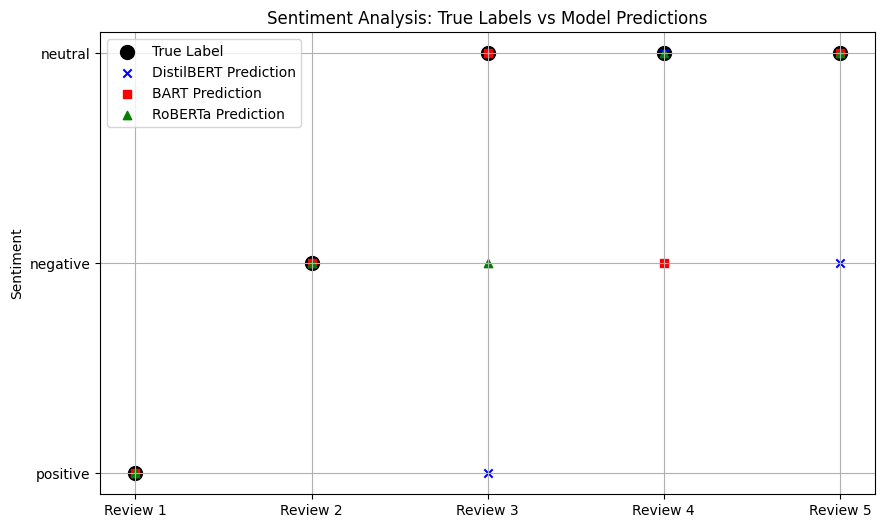

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

# Review indices
indices = range(len(df_results))

# Plotting the true labels
ax.scatter(indices, df_results['true_label'], color='black', label='True Label', marker='o', s=100)

# Plotting the predictions from each model
ax.scatter(indices, df_results['distilbert_prediction'], color='blue', label='DistilBERT Prediction', marker='x')
ax.scatter(indices, df_results['bart_prediction'], color='red', label='BART Prediction', marker='s')
ax.scatter(indices, df_results['roberta_prediction'], color='green', label='RoBERTa Prediction', marker='^')

# Labels and legend
ax.set_xticks(indices)
ax.set_xticklabels([f'Review {i+1}' for i in indices])
ax.set_ylabel('Sentiment')
ax.set_title('Sentiment Analysis: True Labels vs Model Predictions')
ax.legend()

plt.grid(True)
plt.show()

# Evaluate

## Reviews and True Labels:

1. **Review 1:** "This product was great! I absolutely loved it." - **True Label:** Positive
2. **Review 2:** "Worst purchase I have made. Completely disappointed." - **True Label:** Negative
3. **Review 3:** "Okay product, but would not buy again." - **True Label:** Neutral
4. **Review 4:** "I don't know what to think about this product." - **True Label:** Neutral
5. **Review 5:** "It's not bad but not good either." - **True Label:** Neutral

## Model Predictions:

### DistilBERT Predictions (Blue X):
- **Review 1:** Positive (correct)
- **Review 2:** Negative (correct)
- **Review 3:** Positive (incorrect)
- **Review 4:** Neutral (correct)
- **Review 5:** Negative (incorrect)

### BART Predictions (Red Square):
- **Review 1:** Positive (correct)
- **Review 2:** Negative (correct)
- **Review 3:** Neutral (correct)
- **Review 4:** Negative (incorrect)
- **Review 5:** Neutral (correct)

### RoBERTa Predictions (Green Triangle):
- **Review 1:** Positive (correct)
- **Review 2:** Negative (correct)
- **Review 3:** Negative (incorrect)
- **Review 4:** Neutral (correct)
- **Review 5:** Neutral (correct)

## Evaluation:

### Review 1:
All models correctly classified the review as positive.

### Review 2:
All models correctly classified the review as negative.

### Review 3:
- **BART:** correctly classified the review as neutral.
- **RoBERTa:** incorrectly classified it as negative.
- **DistilBERT:** incorrectly classified it as positive.

### Review 4:
- **BART:** incorrectly classified the review as negative.
- **RoBERTa:** correctly classified it as neutral.
- **DistilBERT:** correctly classified it as neutral.

### Review 5:
- **DistilBERT:** incorrectly classified the review as negative.
- **BART:** correctly classified it as neutral.
- **RoBERTa:** correctly classified it as neutral.

## Conclusion:

### DistilBERT:
DistilBERT had issues with Reviews 3 and 5, misclassifying them as positive and negative respectively. It performed well on the other reviews but had some errors.

### BART:
BART correctly classified Reviews 1, 2, 3, and 5 but misclassified Review 4 as negative. This shows strong performance overall, with only one error.

### RoBERTa:
RoBERTa correctly classified Reviews 1, 2, 4, and 5 but misclassified Review 3 as negative. Similar to BART, it shows strong performance with one misclassification.


## Struggles with Neutral Reviews:
The models showed varying degrees of difficulty in handling neutral reviews, which often lack clear positive or negative cases. These reviews are harder to classify, making them challenging for sentiment analysis models to classify correctly. Here's how each model struggled with neutral reviews:

### DistilBERT:
DistilBERT struggled the most with neutral reviews, incorrectly classifying Review 3 as positive and Review 5 as negative. This indicates that DistilBERT might have a bias towards more definitive sentiments, leading to misclassification when the sentiment is unclear.

### BART:
BART had a mixed performance with neutral reviews. It correctly classified Review 3 and 5 but incorrectly classified Review 4 as negative. This suggests that while BART generally handles neutral reviews well, it can still misinterpret ambiguous sentiments.

### RoBERTa:
RoBERTa also faced challenges with neutral reviews, incorrectly classifying Review 3 as negative. However, it correctly identified the sentiment for Reviews 4 and 5, indicating that it has a slightly better grasp of neutrality than DistilBERT but still struggles with certain ambiguous cases.

## Overall Performance:
Overall, BART and RoBERTa are the top performers, with each making only one error. DistilBERT had more significant issues with sentiment classification in this dataset, making two errors. Thus, BART and RoBERTa are better choices for sentiment analysis in this context, with BART having a slight edge in correctly classifying the neutral Review 3. However, all models demonstrated difficulty in handling neutral reviews, reflecting the inherent complexity of classifying sentiments that lack clear positive or negative expressions.
